In [12]:
from ete3 import Tree, TreeStyle, TextFace, add_face_to_node, SeqMotifFace, NodeStyle, faces, ImgFace, \
    CircleFace, AttrFace
def load_tree(tree_path, aln_path=None):
    """
    Load a tree, associate an alignment with it if given
    """
    tree = Tree(tree_path, format=1)
    return tree

loaded_tree = load_tree("./workflow_example.nwk")
outpath = "./tree_img.png"

tag_dict = {'NZ_CP029064.1': ['Single', 'Type3'], 'NZ_AMBZ01000025.1': ['Single', 'Type1'], 'NC_017807.1': ['Single', 'Type2b'], 'NZ_CP014947.1': ['Single', 'Type2b'], 'NZ_LLWJ01000072.1': ['Multiple', 'Type2b', 'Type3'], 'NZ_LLWJ01000072.1_information_Pseudomonas_sp._region_TcdA1_expanded_1227724_1236094_forward': ['Type3'], 'NZ_LLWJ01000072.1_information_Pseudomonas_sp._region_A2_expanded_1249050_1253874_forward': ['Type2b'], 'NZ_LLWJ01000072.1_information_Pseudomonas_sp._region_A1_expanded_1246161_1249020_forward': ['Type2b']}

              
              
region_dict = {}
colour_dict = {'Type1': 'dodgerblue', 'type1': 'dodgerblue', 'Type2b': 'gold', 'Type2a': 'green', 'Type3': 'purple', 'Multiple': 'red', 'unknown': 'black', 'dsda': 'pink', 'Single': 'brown', 'SIngle': 'brown', 'Single ': 'brown', 'Type?': 'pink'}



In [13]:
def get_example_tree(tree, tag_dict, colour_dict, region_dict, outpath):
            
            colour = None

            # Label all internal nodes
            edge = 0
            for node in tree.traverse():
                if not node.is_leaf():
                    node.name = "N%d" % edge
                    edge += 1

            # Get the colours for each extant genome
            for node in tree.iter_descendants("postorder"):
                if node.is_leaf():
                    long_name = node.name.split("_joined")[0]
                    short_name = node.name.split("_information")[0]
                    
                    if long_name in tag_dict:
                        if tag_dict[long_name][0] in colour_dict:

                            colour = colour_dict[tag_dict[long_name][0]]
                        else:
                            colour = 'black'
                            print (tag_dict[long_name][0] + " wasn't there")
                    elif short_name in tag_dict:
                        
                        if len(tag_dict[short_name]) > 2:
                            if "Type?" in tag_dict[short_name]:
                                colour = 'pink'
                            else:
                                colour = 'red'
                        
                        elif len(tag_dict[short_name]) == 2:
                            colour = colour_dict[tag_dict[short_name][1]]
                            
                        else:
                            colout = 'black'

                        
#                         if tag_dict[short_name][0] in colour_dict:
#                             colour = colour_dict[tag_dict[short_name][0]]
#                         else:
#                             print (tag_dict[long_name][0] + " wasn't there")
#                             colour = 'black'
                    else:
                        colour = 'black'
                    spaced_name = " ".join(node.name.split("_")[3:5])

                    nameFace = TextFace("  " + spaced_name, fsize=15, fgcolor='black')
                    
                    #HERE!!
#                     box_domains = get_domains([x for x in region_dict[node.name].keys()])
                    
#                     seqFace = SeqMotifFace(seq=None, motifs=box_domains, gap_format="line")
#                     node.add_face(seqFace, 0, "aligned")

                    node.add_face(nameFace, column=0)

                else:
                    colour = 'black'
                    
                if colour == None:
                    colour = 'black'

                nstyle = NodeStyle()
                nstyle["fgcolor"] = colour
                nstyle["size"] = 20
                node.set_style(nstyle)
                
            
            
                ts = TreeStyle()
                ts.show_leaf_name = False
                ts.branch_vertical_margin = 10
#                 ts.mode = "c"
#                 ts.arc_start = -180 # 0 degrees = 3 o'clock
#                 ts.arc_span = 180
#                 ts.root_opening_factor = 1

                # if custom_layout:
                #     ts.layout_fn = layout
                #     ts.show_leaf_name = False

            # ts.mode = "c"
            ts.root_opening_factor = 1

            return tree, ts

def colour_tips(tree, tag_dict, colour_dict, region_dict, outpath=None, custom_layout=False):

    tree, ts = get_example_tree(tree, tag_dict, colour_dict, region_dict)
    if outpath:
        tree.render(outpath, dpi=30, tree_style=ts)

    display(tree.render('%%inline', dpi=30, tree_style=ts))
    return tree, ts

/Users/gabefoley/Dropbox/Code/Python_Workspace/phyloisland_2019/RBD_Analysis/Debug_tree_save


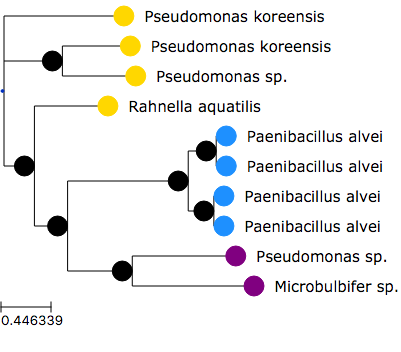

In [14]:

import os
import sys
import argparse
import pickle



def get_domains(domains):
    pos_dict = {'RBD_A': 0, 'RBD_C': 1, 'RBD_B': 2, 'NMD': 3, 'RBD_D': 4, 'TcB_BD_seed': 5}

    domain_list = [
        # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
        [10, 70, "[]", None, 20, "black", "rgradient:lightgreen", "arial|3|black|RBD_A"],
        [80, 140, "[]", None, 20, "black", "rgradient:blue", "arial|3|black|RBD_C"],
        [150, 210, "[]", None, 20, "black", "rgradient:orange", "arial|3|black|RBD_B"],
        [220, 280, "[]", None, 20, "black", "rgradient:purple", "arial|3|black|NMD"],
        [290, 350, "[]", None, 20, "black", "rgradient:gray", "arial|3|black|RBD_D"],
        [360, 430, "[]", None, 20, "black", "rgradient:darkgreen", "arial|3|black|TCB_BD"]]

    for k, v in pos_dict.items():
        if k not in domains:
            domain_list[v][6] = 'white'
            domain_list[v][7] = "arial|3|black|"

    return domain_list

def get_example_tree2(tree, tag_dict, colour_dict, region_dict, outpath):
    print('in get example tree')


    ts = TreeStyle()
    ts.show_leaf_name = False
    # ts.mode = 'c'

    colour = None
    # Get the colours for each extant genome
    for node in tree.iter_descendants("postorder"):
        if node.is_leaf():
            colour = 'pink'
            nstyle = NodeStyle()
            nstyle["fgcolor"] = colour
            nstyle["size"] = 20
            node.set_style(nstyle)
            # spaced_name = " ".join(node.name.split("_")[3:5])

            # nameFace = TextFace("  " + spaced_name, fsize=15, fgcolor='blue')
            # node.add_face(nameFace, column=0)


        # else:
        #     colour = 'black'
        #
        # if colour == None:
        #     colour = 'black'
        #
        # print('node colour here is ')
        # print(colour)
        #
        # print(node)
        #

        else:
            colour = 'orange'

#         spaced_name = " ".join(node.name.split("_")[3:5])

#         nameFace = TextFace("  " + spaced_name, fsize=15, fgcolor='black')
#         node.add_face(nameFace, column=0)

        nstyle = NodeStyle()
        nstyle["fgcolor"] = colour
        nstyle["size"] = 20
        node.set_style(nstyle)


#     tree.render(outpath, dpi=300, tree_style=ts)

    return tree, ts



def colour_tips(tree, tag_dict, colour_dict, region_dict, outpath=None, custom_layout=False):
    tree, ts = get_example_tree(tree, tag_dict, colour_dict, region_dict, outpath)
    # if outpath:
    # ts.layout_fn = lambda x: None

    tree.render(outpath, dpi=300, tree_style=ts)
    
    display(tree.render('%%inline', dpi=30, tree_style=ts))


print (os.getcwd())





colour_tips(loaded_tree, tag_dict, colour_dict, region_dict, outpath)